# This notebook is for data cleaning and Exploratory Data Analysis, which will be used for user persona analysis

* Starbucks dataset: https://www.kaggle.com/datasets/ihormuliar/starbucks-customer-data
* `profile.csv` - dimensional data about each person, including their age, salary, and gender. There is one unique customer for each record
* `portfolio.csv` - information about the promotional offers that are possible to receive, and basic information about each one including the promotional type, duration of the promotion, reward, and how the promotion was distributed to customers
* `transcript.csv` - records show the different steps of promotional offers that a customer received. The different values of receiving a promotion are receiving, viewing, and completing. You also see the different transactions that a person made in the time since he became a customer. With all records, you see the day that they interacted with Starbucks and the amount that it is worth

## Settings

In [43]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import altair as alt

In [25]:
pd.options.display.float_format = '{:,.2f}'.format

## Reading and exploring available data

### Profile data

In [2]:
df_p = pd.read_csv("./data/starbucks/profile.csv")

In [3]:
df_p.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
df_p.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [6]:
df_p.duplicated().sum()

0

In [7]:
df_p.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [8]:
df_p['id'].nunique()

17000

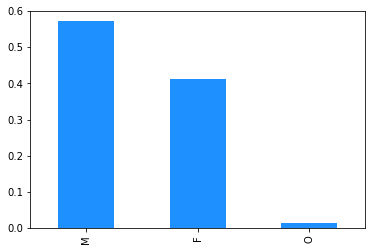

In [9]:
df_p['gender'].value_counts(normalize=True).plot.bar(color='dodgerblue');

In [26]:
df_p['gender'].value_counts(normalize=True)

M   0.57
F   0.41
O   0.01
Name: gender, dtype: float64

The majority of records belongs to Male users (57%)

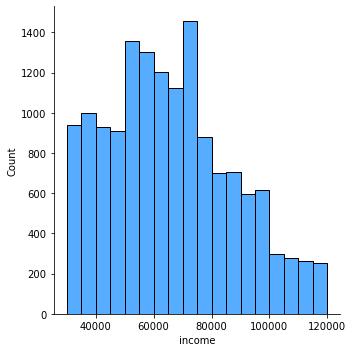

In [18]:
sns.displot(df_p, x="income", color='dodgerblue', binwidth=5000);

In [23]:
df_p['income'].describe()

count    14,825.0
mean     65,405.0
std      21,598.3
min      30,000.0
25%      49,000.0
50%      64,000.0
75%      80,000.0
max     120,000.0
Name: income, dtype: float64

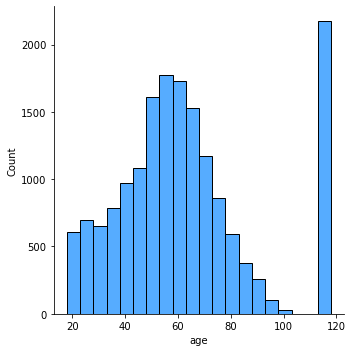

In [27]:
sns.displot(df_p, x="age", color='dodgerblue', binwidth=5);

In [30]:
df_p['age'].describe(percentiles=[0.8, 0.9, 0.95, 0.98, 0.99])

count   17,000.00
mean        62.53
std         26.74
min         18.00
50%         58.00
80%         78.00
90%        118.00
95%        118.00
98%        118.00
99%        118.00
max        118.00
Name: age, dtype: float64

In [33]:
df_p[(df_p['age'] > 80) & (df_p['age'] <= 100)]

,gender,age,id,became_member_on,income
33,F,96,868317b9be554cb18e50bc68484749a2,20171117,"89,000.00"
94,F,89,4264b1d027cc493281bba4f44bfedaca,20171114,"87,000.00"
98,F,90,1c587de019994f93a242c6864fd7bc55,20151210,"98,000.00"
126,M,83,4c29d22467af4d7faa137c4eedd65340,20180127,"46,000.00"
131,F,89,3dae0eadb47149b0b9b548d14548524b,20180114,"65,000.00"
...,...,...,...,...,...
16914,M,87,d1c4500ace2e45e9a45d3cd2fccac8d8,20140920,"59,000.00"
16933,M,85,a65353ea28ff442aabfb39eb974326e3,20161001,"96,000.00"
16938,F,89,da7bf9d84fd74a72bdee595007bcca7a,20170413,"68,000.00"
16981,M,84,1966fa40d2f84620b2b1b9b64f8e0209,20160629,"93,000.00"


In [32]:
df_p[df_p['age'] > 100]

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [51]:
df_p[df_p['age'] > 100]['income'].isnull().sum()

2175

In [36]:
df_p[df_p['age'] > 100]['gender'].isnull().sum()

2175

It seems that there are 2,175 users who didn't provide gender and income information. Also, these users identified themselves as over 100 y.o., which looks suspicious.

In [37]:
df_p['became_member_on'] = pd.to_datetime(df_p['became_member_on'], format='%Y%m%d')

In [38]:
print (df_p.dtypes)

gender                      object
age                          int64
id                          object
became_member_on    datetime64[ns]
income                     float64
dtype: object


In [40]:
df_p.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,"112,000.00"
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,"100,000.00"
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [41]:
df_p['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

In [42]:
df_p['became_member_on'].min()

Timestamp('2013-07-29 00:00:00')

In [44]:
df_p['days_being_member'] = (df_p['became_member_on'].max() - df_p['became_member_on']).dt.days

In [46]:
df_p.head()

,gender,age,id,became_member_on,income,days_being_member
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,529
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,"112,000.00",376
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,14
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,"100,000.00",443
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,356


In [48]:
df_p['days_being_member'].describe(percentiles=[0.8])

count   17,000.00
mean       517.45
std        411.22
min          0.00
50%        358.00
80%        876.00
max      1,823.00
Name: days_being_member, dtype: float64

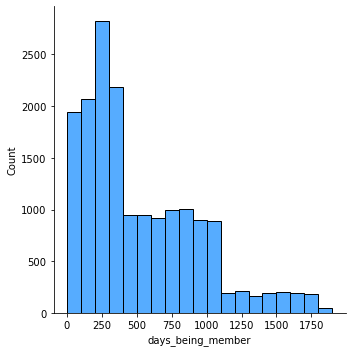

In [50]:
sns.displot(df_p, x="days_being_member", color='dodgerblue', binwidth=100);

***Write down thoughts for data cleaning***

## Data cleaning

### Profile data

In [52]:
df_p = df_p[df_p['age'] <= 100]

In [53]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14820 entries, 1 to 16999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             14820 non-null  object        
 1   age                14820 non-null  int64         
 2   id                 14820 non-null  object        
 3   became_member_on   14820 non-null  datetime64[ns]
 4   income             14820 non-null  float64       
 5   days_being_member  14820 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 810.5+ KB


In [54]:
df_p.isnull().sum()

gender               0
age                  0
id                   0
became_member_on     0
income               0
days_being_member    0
dtype: int64

In [55]:
df_p.describe()

,age,income,days_being_member
count,"14,820.00","14,820.00","14,820.00"
mean,54.38,"65,404.18",522.49
std,17.37,"21,598.76",419.23
min,18.00,"30,000.00",0.00
25%,42.00,"49,000.00",208.00
50%,55.00,"64,000.00",358.00
75%,66.00,"80,000.00",797.00
max,100.00,"120,000.00","1,823.00"


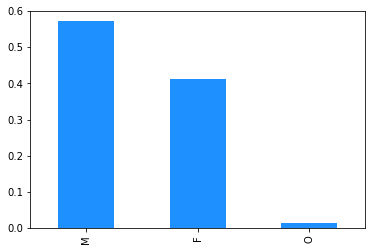

In [56]:
df_p['gender'].value_counts(normalize=True).plot.bar(color='dodgerblue');

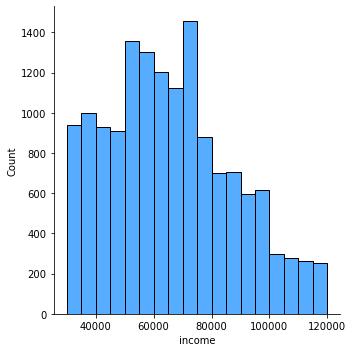

In [59]:
sns.displot(df_p, x="income", color='dodgerblue', binwidth=5000);

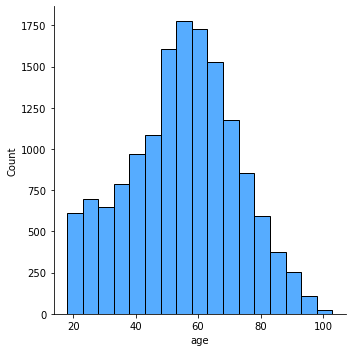

In [60]:
sns.displot(df_p, x="age", color='dodgerblue', binwidth=5);

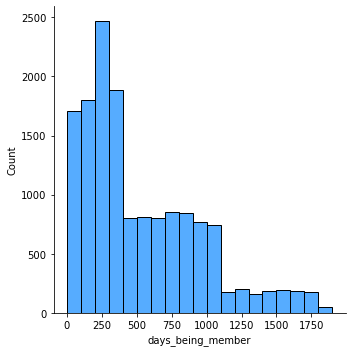

In [61]:
sns.displot(df_p, x="days_being_member", color='dodgerblue', binwidth=100);

In [ ]:
df_t = pd.read_csv("./data/starbucks/transcript.csv")

In [ ]:
df_t.info()

In [ ]:
df_t['person'].nunique()

In [ ]:
df_t['event'].value_counts(normalize=True)

In [ ]:
df_t['value'].value_counts(normalize=True)

In [ ]:
df_t['value'].nunique()

In [ ]:
df_c = pd.read_csv("./data/starbucks/portfolio.csv")

In [ ]:
df_c.head()

In [ ]:
df_c.info()